# CAPSTONE PROJECT 2 -- MOVIE PREDICTION AND RECOMMENDATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime

# Loading the data
- Generation the data from the API 

In [3]:
df = pd.read_csv('data/movie_metadata_self_collect.csv', lineterminator='\n', date_parser= ['release_date'])

In [4]:
df.columns = ['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'vote_count_1']

In [5]:
df.head().T

,0,1,2,3,4
adult,False,False,False,False,False
backdrop_path,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,/y7SQmjlB42VvYyRIFQXLQ4ZYrn.jpg,/vAZZrfi0xwE226zpSTAbJ7gUWwf.jpg,NaN,/wKQlgHjJwh5mGBZ37vDsXBx9zbh.jpg
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 495527, 'name': 'Jumanji Collection', '...","{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,http://www.sonypictures.com/movies/jumanji/,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II


In [6]:
##Inspecting the data. So you can see that have 20 column is object and 4 column is float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247784 entries, 0 to 247783
Data columns (total 26 columns):
adult                    247784 non-null bool
backdrop_path            65632 non-null object
belongs_to_collection    6322 non-null object
budget                   247784 non-null int64
genres                   247784 non-null object
homepage                 27772 non-null object
id                       247784 non-null int64
imdb_id                  157776 non-null object
original_language        247784 non-null object
original_title           247784 non-null object
overview                 202960 non-null object
popularity               247784 non-null float64
poster_path              184540 non-null object
production_companies     247784 non-null object
production_countries     247784 non-null object
release_date             216381 non-null object
revenue                  247784 non-null int64
runtime                  203942 non-null float64
spoken_languages         247784 

In [7]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,vote_count_1
count,2.477840e+05,247784.000000,247784.000000,2.477840e+05,2.039420e+05,247784.000000,84734.000000,163050.000000
mean,9.752955e+05,496842.413110,1.598153,4.392323e+06,5.614684e+02,1.968781,126.655203,1.275044
std,3.912725e+07,198577.393382,3.059260,1.085196e+09,1.576655e+05,3.086484,745.410488,31.299157
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,488308.750000,0.600000,0.000000e+00,1.400000e+01,0.000000,0.000000,0.000000
50%,0.000000e+00,558370.500000,0.600000,0.000000e+00,7.700000e+01,0.000000,3.000000,0.000000
75%,0.000000e+00,627633.250000,1.139000,0.000000e+00,9.900000e+01,5.000000,24.000000,0.000000
max,1.500000e+10,695549.000000,184.473000,5.400000e+11,5.050505e+07,10.000000,25362.000000,4344.000000


### Overview the Features
- adult: Indicates if the movie is X-Rated or Adult.
- belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
- budget: The budget of the movie in dollars.
- genres: A stringified list of dictionaries that list out all the genres associated with the movie.
- homepage: The Official Homepage of the move.
- id: The ID of the move.
- imdb_id: The IMDB ID of the movie.
- original_language: The language in which the movie was originally shot in.
- original_title: The original title of the movie.
- overview: A brief blurb of the movie.
- popularity: The Popularity Score assigned by TMDB.
- poster_path: The URL of the poster image.
- production_companies: A stringified list of production companies involved with the making of the movie.
- production_countries: A stringified list of countries where the movie was shot/produced in.
- release_date: Theatrical Release Date of the movie.
- revenue: The total revenue of the movie in dollars.
- runtime: The runtime of the movie in minutes.
- spoken_languages: A stringified list of spoken languages in the film.
- status: The status of the movie (Released, To Be Released, Announced, etc.)
- tagline: The tagline of the movie.
- title: The Official Title of the movie.
- video: Indicates if there is a video present of the movie with TMDB.
- vote_average: The average rating of the movie.
- vote_count: The number of votes by users, as counted by TMDB.

In [8]:
# We are not interest in these column, so just drop it. 
df.drop(['backdrop_path','vote_count_1', 'homepage','original_title'], axis =1, inplace= True)

# Data Wrangling and Visualization 

- Let consider the budget column and revenue first, that we are alway spending the money to producti movie. But we see that these two column are have a lot data with 0, so we consider it is missing value. 
- Let replace it with the np.nan first
- And popularity also we consider 0 is missing value

In [9]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['popularity'] = df['popularity'].replace(0, np.nan)

- The raw data of  belong_to_collection is format as is list of dictionaries contain ID and name of that collections tion
- But we only interest in the name of collection, so first we need fill missing value with the same format as data
- Then we apply the function to return only the name of collections

In [10]:
##Fill the missing with the name missing_name
df['belongs_to_collection'].fillna(str({'name': None}), inplace =True)

In [11]:
## Convert belong to to name
def convert_belongcolumn_to_list(data):
    data = eval(data) #eval use to convert the string of list to the list ex. '[1,2,3]' = [1,2,3]
    if type(data) == float or type(data) == int:
        return None
    else:
        return data['name']

In [12]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(convert_belongcolumn_to_list)

- For column production_companies, production_countries, genres and spoken_languages
- They are format as the string of list of dictionaries of names it assign to it
- So we do the same as belongs_to_collection, that is create the function and apply to it column and return list of name of it.

In [13]:
##Convert genres to only genres name
## eval() function to convert to string of list to a list '[1,2,3]' = [1,2,3]
def convert_object_to_list(data):
    data = eval(data)
    empty = []
    try:
        for z in data:
            empty.append(z['name'])
        return empty
    except: 
        return None

In [14]:
df['genres']= df['genres'].apply(convert_object_to_list)
df['production_countries'] = df['production_countries'].apply(convert_object_to_list)
df['spoken_languages'] = df['spoken_languages'].apply(convert_object_to_list)

In [15]:
df['production_companies'] = df['production_companies'].apply(convert_object_to_list)

- Now we going add some column to our data set
- Year: Get idea for movie production each year
- ratio_revenue: get idea movie success or fail
- Return: How much profit was make each company

In [16]:
### Convert released_date to date_time format
df['release_date'] = pd.to_datetime(df.release_date)

In [17]:
### Add column year
df['year'] = df.release_date.apply(lambda x: x.year)

In [18]:
## Fill NaN with 0 and convert year to int
df['year'].fillna(0, inplace = True)
df['year'] = df.year.astype(int)

In [19]:
### Created a new column for data name ratio_revenue
df['ratio_revenue'] = df['revenue'] / df['budget']

In [20]:
##Let make another column for total the number company are was make a movie
### Get the max number in in movie
### maybe add new column in later for total company
number_company = []
for i in df.production_companies:
    try:
        number_company.append(len(i))   
    except:
        print(i) ## point where is error

In [21]:
df['number_company'] = df.production_companies.apply(lambda x: len(x))

In [22]:
##Return column (revenue - budget)
df['return'] = df['revenue'] - df['budget']

In [23]:
### get df for only movie have information above budget and revenue
df_ratio_revenue = df[~df['ratio_revenue'].isnull()]

## Filter dataframe

- Year column is greater than 0 and less than 2020
- Title have to have title
- We just interest in the movie are released
- we dont want include adult movie

In [24]:
df = df[(df.year > 0) & (df.year < 2020)]

In [25]:
df = df[~df.title.isna()].reset_index()

In [26]:
df = df[df.status == 'Released']

In [27]:
df = df[df.adult == False]

# VISUALIZATION

## Generation the Cloudword for our collection

In [28]:
title_name = df.title.fillna('')
title_name = ' '.join(title_name)

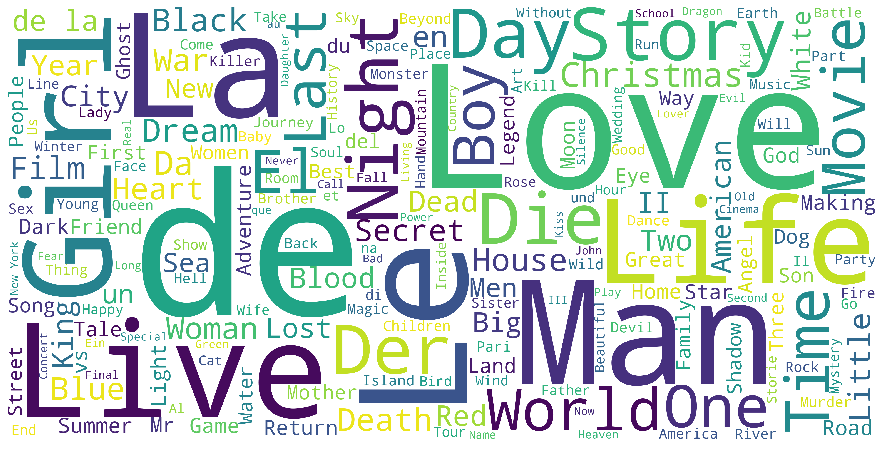

In [29]:
Collection_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_name)
plt.figure(figsize=(16,8))
plt.imshow(Collection_wordcloud)
plt.axis('off')
plt.show()

# Overview film industry over year

In [30]:
year_gr = df.groupby('year').agg({'revenue':['mean','sum','count']})
year_gr.columns = ['Average_revenue','Total_revenue','count']
year_gr.sort_values(by='Total_revenue', ascending = False, inplace = True)

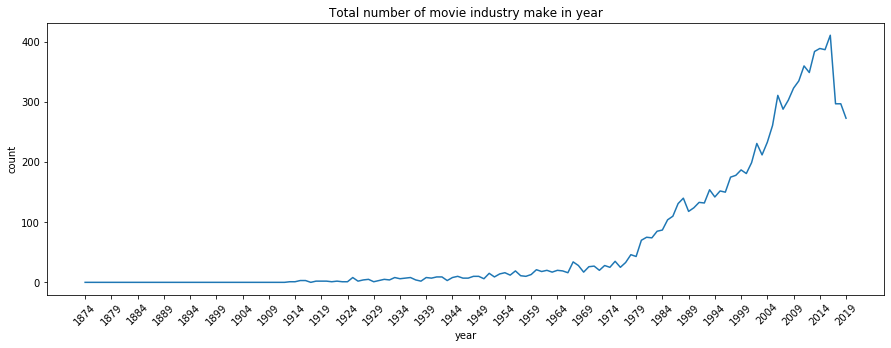

In [31]:
xtick = np.arange(1874,2020,5)
_ = plt.figure(figsize = (15,5))
_ = sns.lineplot(x = year_gr.index, y = 'count', data = year_gr)
_ = plt.title('Total number of movie industry make in year')
_ = plt.xticks(xtick, rotation = 45)


- Total the number of movie was increasing by year, as the graph show us that from 1874 is first movie was make, and they are likely make same number of movie each year to 1924, from 1924 to 1979 have more movie was make, the line begin increasing but not much. And after 1979 the number of movie was increasing alot. As data we have, let look at top 10 year revenue. This is just idea for over look the industry, because our data was have alot missing revenue data. 

In [32]:
year_gr.head(10)

,Average_revenue,Total_revenue,count
year,,,
2016,7.627827e+07,3.135037e+10,411
2015,7.414786e+07,2.869522e+10,387
2014,7.113407e+07,2.767116e+10,389
2013,7.039734e+07,2.703258e+10,384
2012,7.569661e+07,2.641812e+10,349
2011,6.939981e+07,2.498393e+10,360
2010,7.205477e+07,2.413835e+10,335
2009,7.440009e+07,2.403123e+10,323
2008,6.991971e+07,2.118567e+10,303


- As I expected, that the revenue are inscreasing for each year. The film industry are make over 30 billion dota in 2016.
- Now let take a look at 5 early and last movie of our data set

In [33]:
df[['year','title','runtime']].sort_values(by = 'year').head(5)

,year,title,runtime
34693,1874,Passage of Venus,1.0
34690,1878,Sallie Gardner at a Gallop,1.0
70946,1881,Athlete Swinging a Pick,1.0
41270,1883,Buffalo Running,1.0
135279,1885,L'homme machine,1.0


In [34]:
df[['year','title','runtime']].sort_values(by = 'year').tail(5)

,year,title,runtime
174446,2019,Sunday,13.0
174441,2019,Queen + Béjart - Ballet For Life,58.0
126731,2019,The Ocean Washed Open Your Grave,3.0
174467,2019,Entropia,28.0
210551,2019,Jorge,20.0


# Overview film industry in each Countries

In [35]:
### convert the list of company the to single company
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Countries'

In [36]:
countries_df = df.drop('production_countries', axis=1).join(s)

In [37]:
countries_df = countries_df[~countries_df.Countries.isna()]

In [38]:
#### See the each countries make how many film and profit did they got
movies_countries = countries_df.groupby('Countries').agg({'revenue':['mean','sum','count']})
movies_countries.columns = ['average_revenue','total_revenue','number_movie']
movies_countries.sort_values(by = 'number_movie', ascending = False, inplace = True)

- Now we can see the top 10 that countries was make the most revenue in film industry.
    - Bellow you see that USA was have the most revenue and have product alot movie compare to another countries.
- This is just for you have idea which countries was product movie, but the total revenue maybe little biggest than the actual revenue. Because we have some movie was make more than 1 countries, and we just make a make dupilate revenue for that countries with same revenue

In [39]:
movies_countries.head(10)

,average_revenue,total_revenue,number_movie
Countries,,,
United States of America,7.714978e+07,4.976932e+11,6451
United Kingdom,6.990096e+07,7.514353e+10,1075
France,3.021624e+07,2.084921e+10,690
Germany,6.078097e+07,3.014736e+10,496
Canada,5.485054e+07,2.089806e+10,381
India,1.911960e+07,7.246328e+09,379
Japan,3.894279e+07,9.969354e+09,256
Italy,2.382187e+07,5.169346e+09,217
Spain,2.157035e+07,4.378782e+09,203


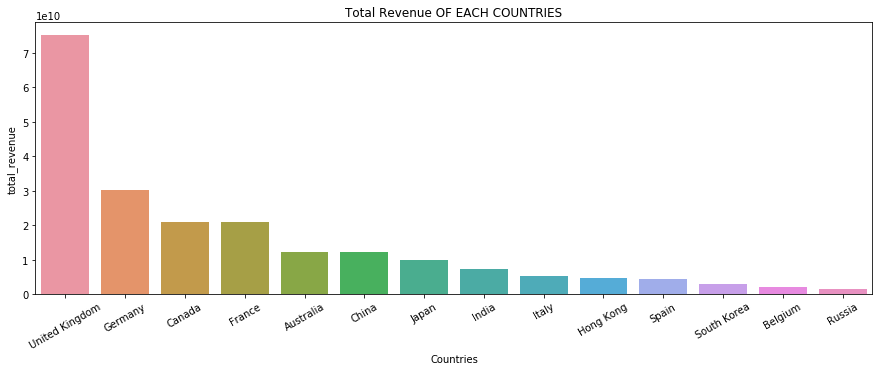

In [40]:
### Average profit of each countries
total_revenue = movies_countries[['total_revenue']][1:15]
total_revenue.sort_values(by = 'total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_revenue.index, y = total_revenue.total_revenue)
_ = plt.title('Total Revenue OF EACH COUNTRIES')
_ = plt.xticks(rotation = 30)

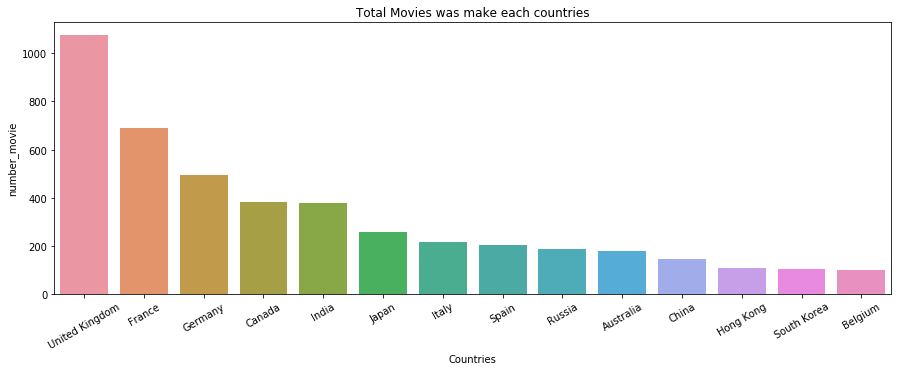

In [41]:
movies = movies_countries[['number_movie']][1:15]
movies.sort_values(by = 'number_movie', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = movies.index, y = movies.number_movie)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Movies was make each countries')

- USA was the top country make the most movie and revenue on movie industry. So we just let left the USA out and see that UK is second countried was product movie.
- France are rank 3 product movie, but their revenue was at rank 5. China is kind opposite, they was rank 12 of countries product movie, but their revenue was rank 7.  

# Overview the company in movie industry

In [42]:
### convert the list of company the to single company
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [43]:
company_df = df.drop('production_companies', axis=1).join(s)

In [44]:
company_df = company_df[~company_df['return'].isna()]

In [45]:
company_df = company_df.groupby('companies').agg({'return': ['mean','sum','count']})
company_df.columns = ['Avergae_profit', 'Total_Profit', 'Number_movie']
company_df.sort_values(by = 'Number_movie', ascending = False, inplace = True)

- Let get idea which company is have the most profit. As we calculated that profit = revenue - budget
    - Company Warner Bros. Pictures make 4.2 billion profit with 476 movie
    - and the second was Universal Pictures with 4.1 billion profit

In [46]:
company_df.head(10)

,Avergae_profit,Total_Profit,Number_movie
companies,,,
Warner Bros. Pictures,9.032809e+07,4.299617e+10,476
Universal Pictures,9.229253e+07,4.088559e+10,443
Paramount,1.014296e+08,3.793466e+10,374
Columbia Pictures,7.684656e+07,2.697314e+10,351
20th Century Fox,1.164543e+08,4.017672e+10,345
Metro-Goldwyn-Mayer,5.015126e+07,1.003025e+10,200
New Line Cinema,8.415754e+07,1.598993e+10,190
Walt Disney Pictures,1.797291e+08,2.821747e+10,157
Touchstone Pictures,6.081461e+07,8.209972e+09,135


- Let Plot the data in histogram so we can easy see it

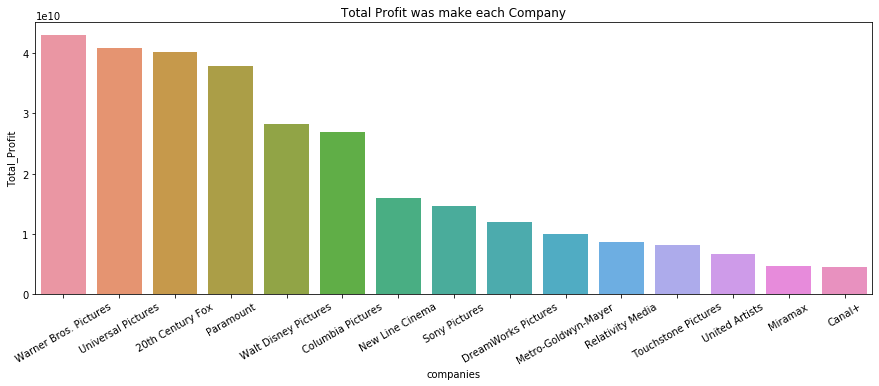

In [47]:
total_profit = company_df[['Total_Profit']][0:15]
total_profit.sort_values(by = 'Total_Profit', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_profit.index, y = total_profit.Total_Profit)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Profit was make each Company')

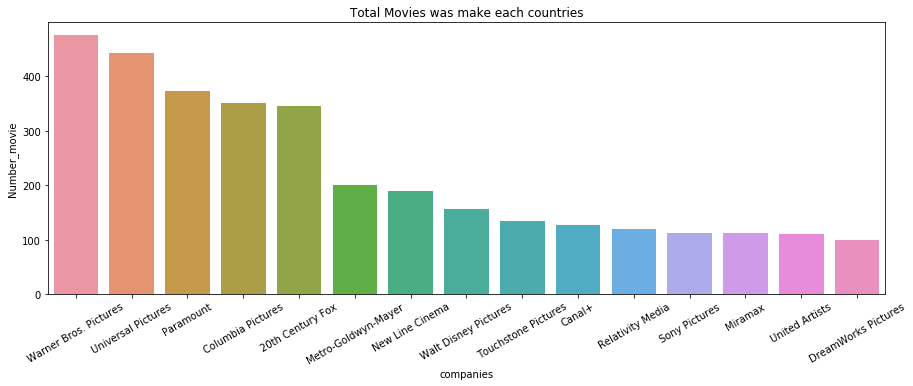

In [48]:
movies = company_df[['Number_movie']][0:15]
movies.sort_values(by = 'Number_movie', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = movies.index, y = movies.Number_movie)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Movies was make each countries')

- The top 4 companies make profit was are a most equal.
- The 20th Century Fox was in rank 5 product movies but, they make rank 3 of total profit.

- Let take a look in the collection of movie, see which series it was top.

# Collection of Movie

In [49]:
collection_df = df.groupby('belongs_to_collection').agg({'revenue': ['mean','sum','count']})
collection_df.columns = ['Average_revenue', 'Total_revenue', 'Total_movie']

In [50]:
collection_df.sort_values(by='Total_revenue',inplace = True, ascending = False)

In [51]:
collection_df.head(10)

,Average_revenue,Total_revenue,Total_movie
belongs_to_collection,,,
Harry Potter Collection,9.633598e+08,7.706879e+09,8
James Bond Collection,2.827486e+08,7.068715e+09,25
Star Wars Collection,9.112054e+08,6.378438e+09,7
The Fast and the Furious Collection,6.406373e+08,5.125099e+09,8
Pirates of the Caribbean Collection,9.043154e+08,4.521577e+09,5
Transformers Collection,8.758574e+08,4.379287e+09,5
Jurassic Park Collection,8.948083e+08,3.579233e+09,4
The Twilight Collection,6.686215e+08,3.343107e+09,5
Ice Age Collection,6.433533e+08,3.216767e+09,5


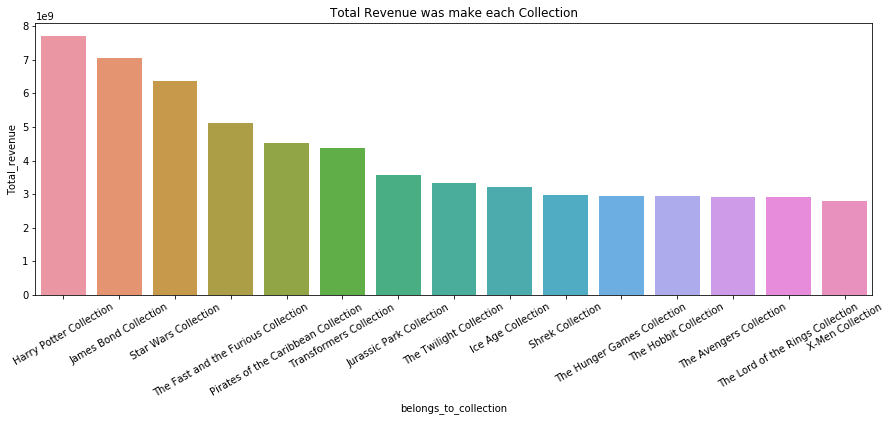

In [52]:
total_revenue = collection_df[['Total_revenue']][0:15]
total_revenue.sort_values(by = 'Total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_revenue.index, y = total_revenue.Total_revenue)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Revenue was make each Collection')

- Harry Potter, James Bond, Star Wars and The Fast and the Furious is top 4 with revenue.
- These movie are so popular and alot people are like it, so it is not suprise when they are top 4 revenue in movie industry.

# Genre of movie
- Let discover which genre are make a good money

In [53]:
genre = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'Genres'

In [54]:
genre_df = df.drop('genres', axis=1).join(genre)

In [55]:
genre_df_gr = genre_df.groupby('Genres').agg({'revenue': ['mean','sum','count']})
genre_df_gr.columns = ['Avergae_revenue','Total_revenue','Total_movie']

In [56]:
genre_df_gr.sort_values(by='Total_revenue',inplace = True, ascending = False)

In [57]:
genre_df_gr.head(10)

,Avergae_revenue,Total_revenue,Total_movie
Genres,,,
Action,1.025900e+08,2.134897e+11,2081
Adventure,1.640720e+08,2.086996e+11,1272
Comedy,5.798689e+07,1.889213e+11,3258
Drama,3.835340e+07,1.773078e+11,4623
Thriller,6.120269e+07,1.302393e+11,2128
Fantasy,1.463286e+08,1.122341e+11,767
Family,1.299991e+08,1.080293e+11,831
Science Fiction,1.181741e+08,1.016297e+11,860
Romance,4.568787e+07,8.073046e+10,1767


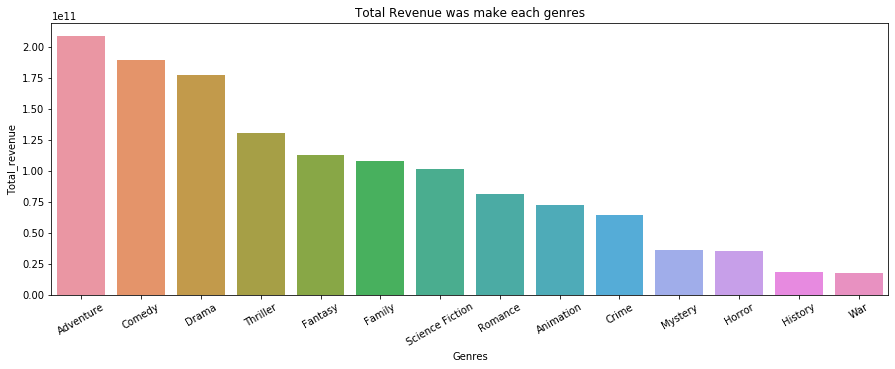

In [58]:
genre = genre_df_gr[['Total_revenue']][1:15]
genre.sort_values(by = 'Total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = genre.index, y = genre.Total_revenue)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Revenue was make each genres')

- Top 3 genre was have most revenue was Adventure, Comedy and Drama.
- And War and history, and Horror are less revenue. It was make cause these type are just adult like, and horror movie not alot people like it, also it have a restrict age to watch the movie too. 

# Average vote

In [59]:
vote_df = pd.DataFrame(df[~df.vote_average.isna()][['title','genres','vote_average','year','vote_count','popularity']])

In [60]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189314 entries, 0 to 210551
Data columns (total 6 columns):
title           189314 non-null object
genres          189314 non-null object
vote_average    189314 non-null float64
year            189314 non-null int64
vote_count      77367 non-null float64
popularity      189287 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.1+ MB


In [61]:
## we assume that vote 0 it mean we doestn have data, so we replace it with na
vote_df['vote_average']= vote_df.vote_average.replace(0,np.nan)

In [62]:
## 60% of our vote_average are missing
## So we cant not just fill missing value with median or average. I decide to remove all the missing 
## Now we just base on the data we have to tell above movie vote_average
vote_df = vote_df[~vote_df.vote_average.isna()]

In [63]:
vote_df['vote_count'].fillna(vote_df['vote_count'].median(), inplace = True)

In [64]:
vote_df.sort_values(by ='vote_average', ascending = False, inplace = True)
vote_df.head()

,title,genres,vote_average,year,vote_count,popularity
84290,Premiata Forneria Marconi - PFM in Classic da ...,[],10.0,2013,15.0,0.600
49613,Technicolor Dream,[],10.0,2017,1.0,0.634
136597,Traces in the Sand,[],10.0,1954,15.0,0.600
68703,Expedition Sasquatch,[Documentary],10.0,2018,1.0,0.641
136556,O Cinema Que Não Se Vê,[Documentary],10.0,2018,15.0,0.600


In [65]:
vote_df.describe()

,vote_average,year,vote_count,popularity
count,71603.000000,71603.000000,71603.000000,71602.000000
mean,6.318632,1997.855453,153.658017,3.725849
std,1.568004,23.932855,807.867667,4.605601
min,0.500000,1874.000000,1.000000,0.600000
25%,5.500000,1987.000000,7.000000,0.988000
50%,6.300000,2008.000000,15.000000,2.314500
75%,7.100000,2016.000000,33.000000,4.455000
max,10.000000,2019.000000,25362.000000,129.205000


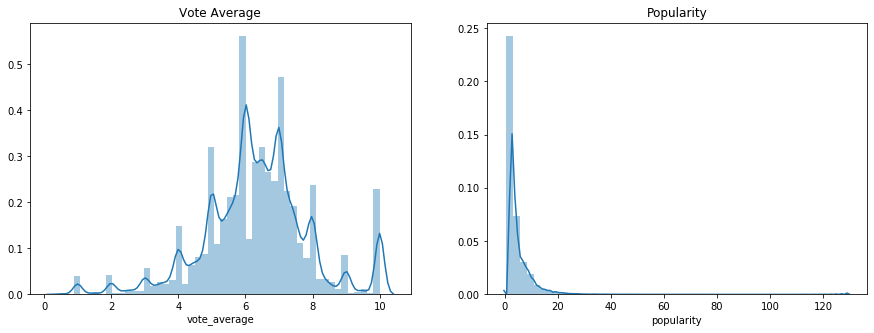

In [66]:
_ = plt.figure(figsize= (15,5))
_ = plt.subplot(1,2,1)
_ = sns.distplot(vote_df.vote_average)
_ = plt.title('Vote Average')
_ = plt.subplot(1,2,2)
_ = sns.distplot(vote_df.popularity.fillna(vote_df.popularity.median()))
_ = plt.title('Popularity')

In [67]:
### Vote count great than 2000

vote_df_2000 = vote_df[vote_df.vote_count > 2000]

In [68]:
vote_df_2000.describe()

,vote_average,year,vote_count,popularity
count,1240.000000,1240.000000,1240.000000,1240.000000
mean,6.924274,2004.835484,4967.919355,22.860356
std,0.757241,12.658054,3439.947728,10.740846
min,4.300000,1936.000000,2001.000000,0.600000
25%,6.400000,2001.000000,2594.000000,16.956250
50%,6.900000,2008.000000,3721.500000,20.510000
75%,7.500000,2013.000000,5932.500000,26.180750
max,8.800000,2019.000000,25362.000000,129.205000


In [69]:
vote_df_2000 = vote_df_2000.sort_values(by ='vote_average', ascending = False)
vote_df_2000.head(10)

,title,genres,vote_average,year,vote_count,popularity
10288,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",8.8,1995,2247.0,30.290
314,The Shawshank Redemption,"[Drama, Crime]",8.7,1994,15772.0,60.107
834,The Godfather,"[Drama, Crime]",8.7,1972,11969.0,54.408
522,Schindler's List,"[Drama, History, War]",8.6,1993,9499.0,35.534
2211,Life Is Beautiful,"[Comedy, Drama]",8.5,1997,8616.0,30.194
1178,The Godfather: Part II,"[Drama, Crime]",8.5,1974,7058.0,36.223
66260,Parasite,"[Comedy, Thriller, Drama]",8.5,2019,6496.0,91.695
3030,The Green Mile,"[Fantasy, Drama, Crime]",8.5,1999,9935.0,31.193
39940,Your Name.,"[Romance, Animation, Drama]",8.5,2016,5315.0,32.500
5481,Spirited Away,"[Animation, Family, Fantasy]",8.5,2001,9148.0,36.899


# Let view our data relation

- Now let check the correlation of each column.
- We create new data time, with have no missing value

In [70]:
new_df = df[~df.ratio_revenue.isna()]

In [71]:
new_df_1 = new_df[['budget','popularity','revenue','vote_average','runtime','vote_count','ratio_revenue']]

In [72]:
corr = new_df_1.corr()

In [73]:
corr

,budget,popularity,revenue,vote_average,runtime,vote_count,ratio_revenue
budget,1.000000,0.088243,0.138193,-0.041993,-0.012755,0.583655,-0.003023
popularity,0.088243,1.000000,0.612238,0.308401,0.224916,0.765559,-0.011527
revenue,0.138193,0.612238,1.000000,0.151412,0.180604,0.772701,-0.009124
vote_average,-0.041993,0.308401,0.151412,1.000000,0.352408,0.295343,0.000269
runtime,-0.012755,0.224916,0.180604,0.352408,1.000000,0.188074,-0.009568
vote_count,0.583655,0.765559,0.772701,0.295343,0.188074,1.000000,-0.010701
ratio_revenue,-0.003023,-0.011527,-0.009124,0.000269,-0.009568,-0.010701,1.000000


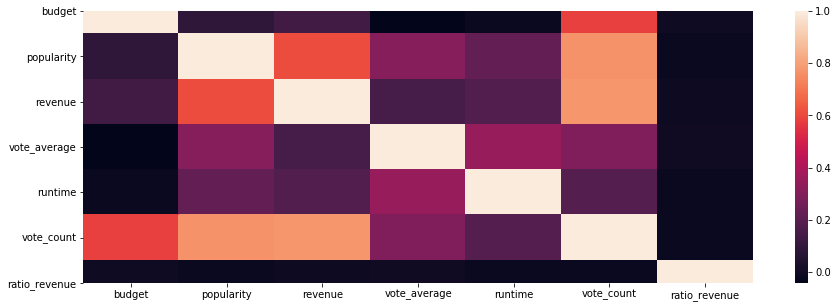

In [74]:
_ = plt.figure(figsize = (15,5))
_ = sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)
_ = plt.title

- The correlation is show our data not have much correlation of data.
- Vote_count and revenue are have correlation, so let we get investage is that true if we get more people count, the we will have more revenue
- We expect that movie have more buget will have more revenue, but data show that they are not correlation
- Let make a pairplot for vote_count and revenue, so we can get better idea

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1080x360 with 0 Axes>

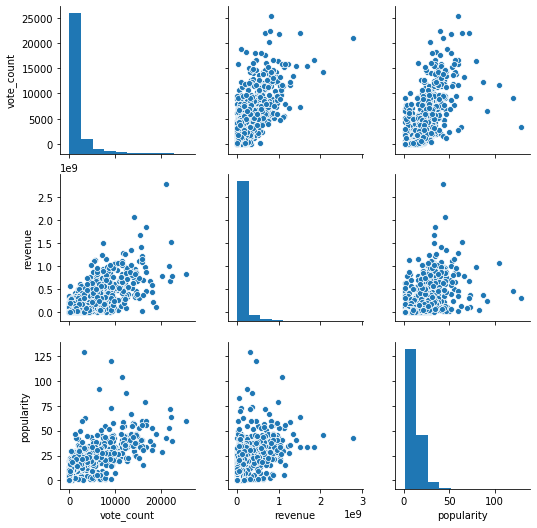

In [75]:
vote_revenue = pd.DataFrame(new_df[['vote_count','revenue','popularity']])
_ = plt.figure(figsize = (15,5))
_ = sns.pairplot(vote_revenue)

- They are not much correlation with each other, they wasnt strong enough for us to get result from each other.
- We are assuming it if we have more budget put on the movie, then it will lead us the movie more success, to answer this let see out relation of it


# Inferential Statistic

In [76]:
new_df['success_fail'] = new_df.ratio_revenue.apply(lambda x: 1 if x > 1 else 0)

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
## Create a new subset for budget and success or fail only
new_df_1 = pd.DataFrame(new_df[['budget', 'success_fail', 'runtime']])
## seperate the success and fail and then we apply statisic to compare them
success_df = new_df_1[new_df_1.success_fail == 1]
success = success_df.budget
fail_df = new_df_1[new_df_1.success_fail == 0]
fail = fail_df.budget

- Before we do inferential statistic, we need remove the outlier of our data sample
- Use boxplot to determine the outlier.

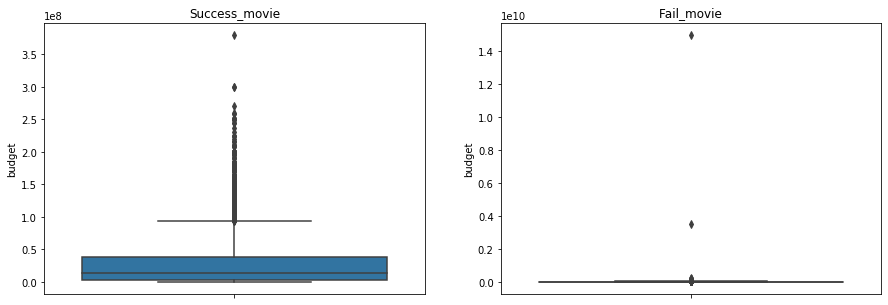

In [78]:
_ = plt.figure(figsize = (15,5))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(y = success)
_ = plt.title('Success_movie')
_ = plt.subplot(1,2,2)
_ = sns.boxplot(y= fail)
_ = plt.title('Fail_movie')

- The fail movie have 1 point so much larger than our data, so we havent see it clear where our boxplot, but let perform step by step to remove the outlier, then we come up with out fail_movie have was fall below 47M
- And the success movie is easy, we can see that out success movie budget will have fall bellow 56M

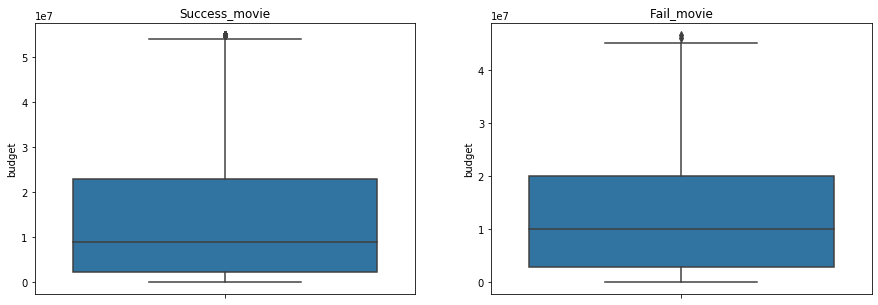

In [79]:
success_df = success_df[success_df.budget < 56000000]
success = success_df.budget
fail_df = fail_df[fail_df.budget < 47000000]
fail = fail_df.budget

_ = plt.figure(figsize = (15,5))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(y = success)
_ = plt.title('Success_movie')
_ = plt.subplot(1,2,2)
_ = sns.boxplot(y= fail)
_ = plt.title('Fail_movie')

In [80]:
## Calculation mean of success and fail movie

print ('Mean of Success movie: ' + str(round(np.mean(success))))
print ('Mean of Fail movie: ' + str(round(np.mean(fail))))

Mean of Success movie: 14320420.0
Mean of Fail movie: 12881658.0


- The mean of success movie are around 14M
- And the mean of fail movie are around 13M
- Now we use the bootstrapping sampling to see if it is the mean of success movie around 1.4M and fail around 1.3M

In [81]:
## Bootstrapping
np.random.seed(42)
def bs_replicate_id(data, func):
    temp = np.random.choice(data, len(data))
    return func(temp)
def draw_bs_replicate(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bs_replicate_id(data, func)
    return bs_replicates
    
success_sampling = draw_bs_replicate(success, np.mean, 1000)
fail_sampling = draw_bs_replicate(fail, np.mean, 1000)

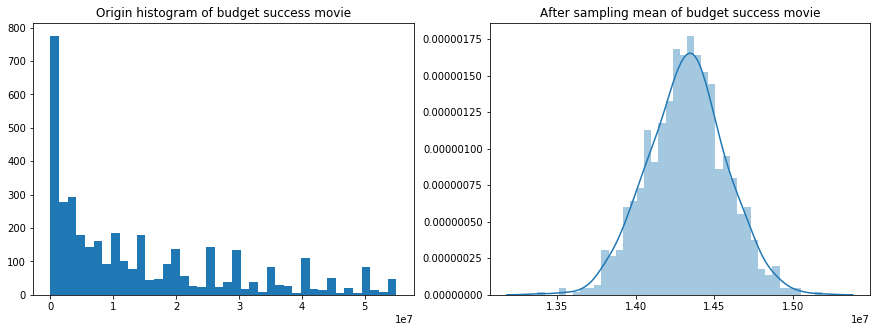

In [82]:
_ = plt.figure(figsize=(15,5))
_ = plt.subplot(1,2,1)
_ = plt.hist(success, bins = 40)
_ = plt.title('Origin histogram of budget success movie')
_ = plt.subplot(1,2,2)
_ = sns.distplot(success_sampling, bins = 40)
_ = plt.title('After sampling mean of budget success movie')


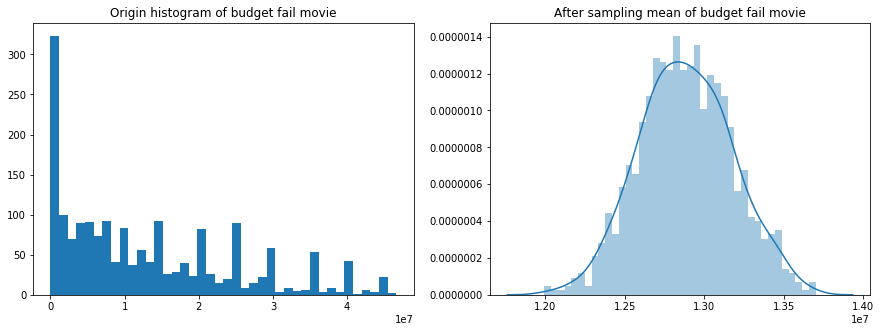

In [83]:
_ = plt.figure(figsize=(15,5))
_ = plt.subplot(1,2,1)
_ = plt.hist(fail, bins = 40)
_ = plt.title('Origin histogram of budget fail movie')
_ = plt.subplot(1,2,2)
_ = sns.distplot(fail_sampling, bins = 40)
_ = plt.title('After sampling mean of budget fail movie')


In [84]:
print ('After bootstrap sampling mean of success movie: ' + str(round(np.mean(success_sampling))))
print ('After bootstrap sampling mean of fail movie: ' + str(round(np.mean(fail_sampling))))

After bootstrap sampling mean of success movie: 14324207.0
After bootstrap sampling mean of fail movie: 12885716.0


- After we do bootstrapping sampling, random choice from data and calculation the mean, we can tell that we mean of success movie are around 14M and fail movie are 13M 

In [85]:
print('Different mean of sucess and fail: ' + str((round(np.mean(success) - np.mean(fail)))))

Different mean of sucess and fail: 1438763.0


- Let use the different mean of our success movie and fail movie, then we can get idea the 95% confidence of different success and fail
- Test our hypothesis testing:
    - Define hypothesis:
        - Null hypothesis is the different mean of success and fail greater or equal 1438763
        - Alternative hypothesis is less than 1438763
    - With 95% confidence interval, so we have
        - significan level = 0.05
    - Use bootstraping to compare the mean
    

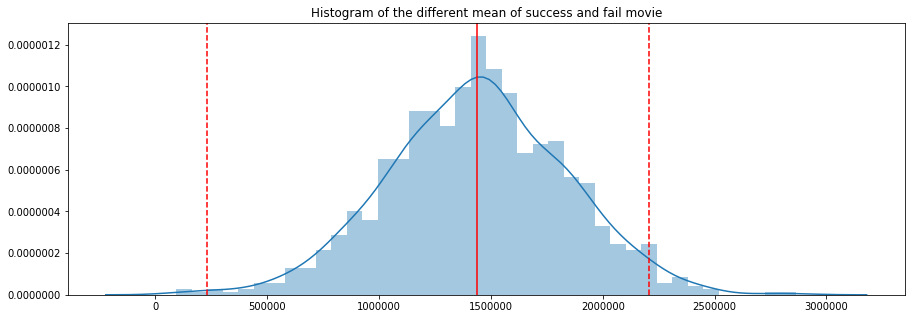

In [86]:
diff_mean = success_sampling - fail_sampling

lower, upper = np.percentile(diff_mean, [0.25, 97.5])
_ = plt.figure(figsize = (15,5))
_ = sns.distplot(diff_mean, bins = 40)
_ = plt.axvline(upper, c = 'r', linestyle = '--')
_ = plt.axvline(lower, c= 'r', linestyle = '--')
_ = plt.axvline(np.mean(diff_mean), c = 'r')
_ = plt.title('Histogram of the different mean of success and fail movie')

In [87]:
# calculation the p_value
p = np.sum(diff_mean > 1438763) / len(diff_mean)
print('P_value of the different mean of success and fail: ' + str(p))

P_value of the different mean of success and fail: 0.501


In [88]:
print('lower_limit 95% confidence interval: ' + str(lower))
print('Upper limit of 95% confidence interval: ' + str(upper))

lower_limit 95% confidence interval: 232797.45881236205
Upper limit of 95% confidence interval: 2204724.2092483896


- So we cant not rejected the Null hypothesis, because the p_value of different mean are so much larget than the significan level
- 95% confidence interval of the mean from success movie and fail movie is [232796, 2204724]
- With our hypothesis testing that success and fail movie, they are have different everage of budget is greater than 1438763

# MACHINE LEARNING MODEL
- Predict either movie are success or fail


### Prepare the data

In [89]:
### Prepare data
# Add column target y, is column we are going predict. if 1 movie is success and 0 is movie fail
df = df[df.ratio_revenue.notnull()]
df['target_y'] = df['ratio_revenue'].apply(lambda x: 1 if x > 1 else 0)

In [871]:
#Selected only feature need for our predict model
df_ml = pd.DataFrame(df[['belongs_to_collection', 'budget', 'genres',
        'original_language', 'popularity',
        'production_countries', 'runtime', 'spoken_languages',
        'vote_average', 'vote_count', 'year',
       'number_company', 'target_y']])

In [92]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6612 entries, 0 to 209882
Data columns (total 13 columns):
belongs_to_collection    1410 non-null object
budget                   6612 non-null float64
genres                   6612 non-null object
original_language        6612 non-null object
popularity               6612 non-null float64
production_countries     6612 non-null object
runtime                  6570 non-null float64
spoken_languages         6612 non-null object
vote_average             6612 non-null float64
vote_count               6169 non-null float64
year                     6612 non-null int64
number_company           6612 non-null int64
target_y                 6612 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 723.2+ KB


In [93]:
### Convert category data to numeric
df_ml['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if x != np.nan else 0)
genre_movie = genre_df.Genres.unique()
for genre in genre_movie:
    df_ml['is_'+ str(genre)] = df_ml.genres.apply(lambda x: 1 if genre in x else 0)
df_ml['is_english'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0) 
df_ml['number_countries'] = df['production_countries'].apply(lambda x: len(x))
df_ml['runtime']= df_ml['runtime'].fillna(df_ml.runtime.mean())
df_ml['number_language'] = df_ml['spoken_languages'].apply(lambda x: len(x))
df_ml['vote_count'] = df['vote_count'].fillna(df['vote_count'].mean())
df_ml.drop(['genres', 'production_countries', 'original_language','spoken_languages'], axis = 1, inplace = True)

In [872]:
df_ml.shape

(6612, 13)

- So we have 6612 row, and 12 feature and 1 target
- We split it to 60% traing and 40% test

In [873]:
#Separate our features and target
X = df_ml.drop('target_y', axis =1)
y = df['target_y']

In [96]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 42)

### Model classification

#### Model 1 - Random forest classfication

In [232]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
y_predict = cls.predict(Xtest)
cls.score(Xtest, ytest)

0.7844990548204159

In [122]:
##Evaluation the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_curve
report = classification_report(ytest, y_predict)
score_accurary = accuracy_score(ytest, y_predict)
score_f1 = f1_score(ytest, y_predict)

In [124]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       785
           1       0.82      0.89      0.85      1860

    accuracy                           0.78      2645
   macro avg       0.75      0.71      0.73      2645
weighted avg       0.78      0.78      0.78      2645



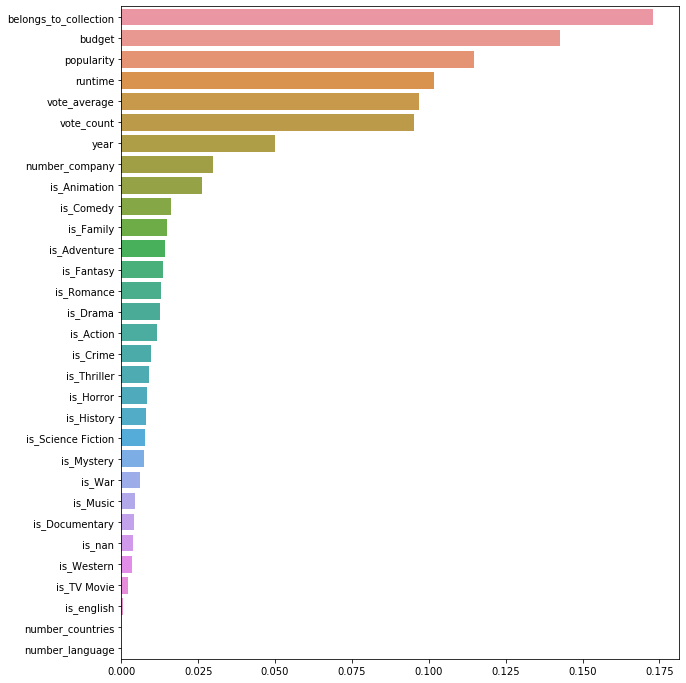

In [128]:
plt.figure(figsize=(10,12))
x = sorted(cls.feature_importances_, reverse= True)
sns.barplot(x=x, y=X.columns)

#### Model 2-  Gradient Boosting Classifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(Xtrain, ytrain)
y_predict_g = clf.predict(Xtest)
clf.score(Xtest, ytest)

0.7837429111531191

In [130]:
##Evaluation the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_curve

report = classification_report(ytest, y_predict_g)
score_accurary = accuracy_score(ytest, y_predict_g)
score_f1 = f1_score(ytest, y_predict_g)

In [131]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       785
           1       0.82      0.88      0.85      1860

    accuracy                           0.78      2645
   macro avg       0.74      0.71      0.73      2645
weighted avg       0.78      0.78      0.78      2645



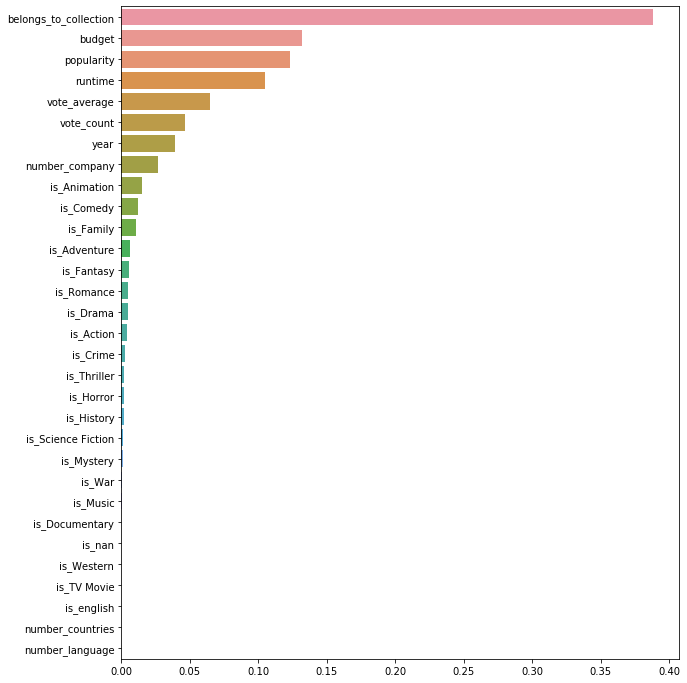

In [127]:
plt.figure(figsize=(10,12))
x = sorted(clf.feature_importances_, reverse= True)
sns.barplot(x=x, y=X.columns)

#### Model 3 - LogisticRegression

In [132]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(Xtrain, ytrain)
y_predict_l = log.predict(Xtest)
log.score(Xtest,ytest)

0.7039697542533081

In [135]:
##Evaluation the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_curve

report = classification_report(ytest, y_predict_l)
score_accurary = accuracy_score(ytest, y_predict_l)
score_f1 = f1_score(ytest, y_predict_l)

In [136]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       785
           1       0.70      1.00      0.83      1860

    accuracy                           0.70      2645
   macro avg       0.85      0.50      0.42      2645
weighted avg       0.79      0.70      0.58      2645



### Hyperparameter for Random forest and Gradient Boosting

#### Model 1 - Random Forest

In [236]:
#Random forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [237]:
rf_random = RandomizedSearchCV(cls, random_grid, cv = 5, random_state = 42)

In [238]:
rf_random.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [239]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 105,
 'bootstrap': True}

In [240]:
rf_random.score(Xtest,ytest)

0.7739130434782608

#### Model 2 - Gradient Boosting

###### Tunning each parameter

For tunning the Gradient boosting model, it take so long to do auto all parameter same time.
So we will manual do one by one.

In [174]:
from sklearn.model_selection import RandomizedSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gs_model_1 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_distributions = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gs_model_1.fit(Xtrain,ytrain)

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=8,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=500,
                                               

In [176]:
gs_model_1.best_params_, gs_model_1.best_score_

({'n_estimators': 80}, 0.8233431771629955)

In [207]:
from sklearn.model_selection import RandomizedSearchCV
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gs_model_2 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=50,n_estimators = 80,max_features='sqrt',subsample=0.8,random_state=10), 
param_distributions = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gs_model_2.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                 

In [208]:
gs_model_2.best_params_, gs_model_2.best_score_

({'min_samples_split': 400, 'max_depth': 11}, 0.8257688962583281)

In [221]:
from sklearn.model_selection import RandomizedSearchCV
param_test3 = {'min_samples_leaf':range(30,71,10), 'max_features':range(7,33,2)}
gs_model_3 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=400,max_depth=7,n_estimators = 80,subsample=0.8,random_state=10), 
param_distributions = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gs_model_3.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=400,
                                                  

In [222]:
gs_model_3.best_params_, gs_model_3.best_score_

({'min_samples_leaf': 30, 'max_features': 17}, 0.8315583599936248)

In [214]:
gs_model_3.score(Xtest,ytest)

0.8224696938565853

In [223]:
from sklearn.model_selection import RandomizedSearchCV
param_test4 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9], 'learning_rate':[0.1, 0.05, 0.001, 0.0001]}
gs_model_4 = RandomizedSearchCV(estimator = GradientBoostingClassifier(min_samples_leaf = 30,max_features = 17,min_samples_split=400,max_depth=7,n_estimators = 80,random_state=10), 
param_distributions = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gs_model_4.fit(Xtrain,ytrain)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=7,
                                                        max_features=17,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=30,
                                                        min_samples_split=400,
                                                   

In [224]:
gs_model_4.best_params_, gs_model_4.best_score_

({'subsample': 0.9, 'learning_rate': 0.1}, 0.8324026482356468)

In [225]:
gs_model_4.score(Xtest,ytest)

0.8234662009451408

###### Final tunning model

In [226]:
gmb_model = GradientBoostingClassifier(n_estimators = 80, min_samples_leaf = 30,max_features = 17,
                                       min_samples_split=400,max_depth=7,random_state=10, 
                                       subsample = 0.9, learning_rate = 0.1)

In [227]:
gmb_model.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=17, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=400,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [253]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(gmb_model, cv = 5, X = X, y = y,scoring= 'roc_auc')
cross_score

array([0.84396923, 0.83549008, 0.83531816, 0.81193947, 0.71206675])

In [249]:
y_pred_new = gmb_model.predict(Xtest)

In [229]:
gmb_model.score(Xtest,ytest)

0.7841209829867675

In [252]:
print(classification_report(ytest, y_pred_new))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       785
           1       0.83      0.88      0.85      1860

    accuracy                           0.78      2645
   macro avg       0.74      0.72      0.73      2645
weighted avg       0.78      0.78      0.78      2645



# Recommendation System

### Preparation the Data

In [874]:
rating_df = pd.read_csv('data/ratings_small.csv')
movie_df = pd.read_csv('data/movies.csv')

In [875]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [876]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [877]:
movie_df['genres_new'] = movie_df.genres.apply(lambda x: x.split('|'))
movie_df.head()

,movieId,title,genres,genres_new
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [878]:
genre_movie_new = movie_df.apply(lambda x: pd.Series(x['genres_new']), axis = 1).stack().reset_index(level =1, drop= True)
genre_movie_new.name = 'Genres_1'

In [879]:
movie_df_1 = movie_df.join(genre_movie_new)

In [880]:
recommend_df_rating = pd.merge(rating_df, movie_df_1)
recommend_df_rating.head()

,userId,movieId,rating,timestamp,title,genres,genres_new,Genres_1
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,[Drama],Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,[Drama],Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,[Drama],Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,[Drama],Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,[Drama],Drama


In [881]:
recommend_df_rating.shape

(260312, 8)

### Basic recommendation
  - This for user, that first time use the website

#### Top 20 movie with hight rating

In [939]:
def recommend_top_20_movie(df= recommend_df_rating):
    recommend_base_rating = pd.DataFrame(df.groupby(['movieId','title','genres'])['rating'].mean())
    recommend_base_rating['count_rating'] = df.groupby(['movieId','title','genres'])['rating'].count()
    recommend_base_rating = recommend_base_rating[recommend_base_rating['count_rating'] > 10]
    result = recommend_base_rating.sort_values(by = 'rating', ascending = False)
    return result.reset_index()[['title','genres']].head(20)

In [940]:
recommend_top_20_movie()

,title,genres
0,In a Lonely Place (1950),Drama|Film-Noir|Mystery|Romance
1,Paperman (2012),Animation|Comedy|Romance
2,Diabolique (Les diaboliques) (1955),Horror|Mystery|Thriller
3,Paradise Now (2005),Crime|Drama|Thriller|War
4,"Best Years of Our Lives, The (1946)",Drama|War
5,Drunken Master (Jui kuen) (1978),Action|Comedy
6,Inherit the Wind (1960),Drama
7,Tell No One (Ne le dis à personne) (2006),Crime|Drama|Mystery|Thriller
8,For the Birds (2000),Animation|Children|Comedy
9,"Wind Rises, The (Kaze tachinu) (2013)",Animation|Drama|Romance


- It return top 20 movie that have at leat 10 people rating and have the highest rating average
- But sometime people want want see only genres they are like. So we can recommend them the top movie with genre with have the highest average rating

#### Recommendation movie by Genres and most rating recommendation

In [941]:
def get_recommend_genre(genre, df = recommend_df_rating):
    temp_df = df[df.Genres_1 == genre]
    recommend_movie = pd.DataFrame(temp_df.groupby(['movieId','title','genres'])['rating'].mean())
    recommend_movie['count_rating'] = temp_df.groupby(['movieId','title','genres'])['rating'].count()
    
    result = recommend_movie.sort_values(by = 'rating', ascending = False)
    
    result_1 = result[result.count_rating > 10]

    return result_1.reset_index()[['title','genres']].head(15)

- List of genres movie

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
'Western', 'Film-Noir']

In [942]:
get_recommend_genre("Drama")

,title,genres
0,"Best Years of Our Lives, The (1946)",Drama|War
1,Inherit the Wind (1960),Drama
2,"Godfather, The (1972)",Crime|Drama
3,"Shawshank Redemption, The (1994)",Crime|Drama
4,Gladiator (1992),Action|Drama
5,On the Waterfront (1954),Crime|Drama
6,All About Eve (1950),Drama
7,Ran (1985),Drama|War
8,Mister Roberts (1955),Comedy|Drama|War
9,"Godfather: Part II, The (1974)",Crime|Drama


- These are list of 15 movie with highest average rating and have at least 10 people rate on that movie

### Correlation-base recommendation
    
   - Use Pearson's r correlation to recommend a movie that is most similar to the movie that user have early watch
   - Base on the of all the user rating the movie, so we can calculation the correlation of movie.

In [685]:
## Prepare cross table
cross_table = pd.pivot_table(data = recommend_df_rating, values='rating', index = 'userId', columns = 'movieId')

In [943]:
def get_recommendation_movie_corr(movie_name, cross_table= cross_table, basic_df= recommend_df_rating, rating_df= rating_df):
    movie_id = basic_df[basic_df.title == movie_name]['movieId'].unique()
    movie_rating = cross_table[movie_id[0]]
    #Get similar
    similar = cross_table.corrwith(movie_rating)
    corr_movie = pd.DataFrame(similar, columns = ['PearsonR'])
    #
    corr_movie.dropna(inplace= True)
    #
    rating_df_1 = pd.DataFrame(rating_df.groupby('movieId')['rating'].count())
    rating_df_1.columns = ['count_rating']
    #
    corr_summary = corr_movie.join(rating_df_1)
    #
    corr_summary_movie = corr_summary[corr_summary.count_rating > 10]
    corr_summary_movie = corr_summary_movie.sort_values(by = 'PearsonR', ascending = False)
    similar_movie = corr_summary_movie[corr_summary_movie.PearsonR > 0.95]
    
    #
    movie_df_corr = pd.DataFrame(similar_movie.index, columns = ['movieId'])
    #
    similar_movie_df = pd.merge(movie_df_corr, recommend_df_rating, how = 'left', on = 'movieId')
    recommendation_movie = similar_movie_df.groupby(['title','genres'])
    result = pd.DataFrame(recommendation_movie.groups.keys(), columns = ['title','genres'])

    return result.head(15)
    

In [944]:
#recom_df.title.unique()
recommend_df_rating[recommend_df_rating.title =='Dangerous Minds (1995)' ]['genres'].drop_duplicates()

0    Drama
Name: genres, dtype: object

In [945]:
get_recommendation_movie_corr('Dangerous Minds (1995)')

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,genres
0,...And Justice for All (1979),Drama|Thriller
1,127 Hours (2010),Adventure|Drama|Thriller
2,2 Days in the Valley (1996),Crime|Film-Noir
3,"2 Fast 2 Furious (Fast and the Furious 2, The)...",Action|Crime|Thriller
4,21 (2008),Crime|Drama|Romance|Thriller
5,300 (2007),Action|Fantasy|War|IMAX
6,40 Days and 40 Nights (2002),Comedy|Romance
7,About Last Night... (1986),Comedy|Drama|Romance
8,Absolute Power (1997),Mystery|Thriller
9,"Addams Family, The (1991)",Children|Comedy|Fantasy


### Model-base Collaborative filtering system recommendation
- Create the recommender model user rating, and recommend movie base on the model
- Use Singular Value Decomposition(SVD)

In [521]:
from sklearn.decomposition import TruncatedSVD

###### Building matrix

In [866]:
## Fill to fill nan == 0
rating_crosstab = recommend_df_rating.pivot_table(values = 'rating', index = 'userId', columns = 'title', fill_value=0)

##### Transposting the Matrix

In [867]:
#Transform the matrix
X = rating_crosstab.T
# Decomposing the matrix
SVD = TruncatedSVD(n_components= 12, random_state=42)
result  = SVD.fit_transform(X)
#Correlation
corr_mat = np.corrcoef(result)

In [868]:
corr_mat.shape

(7062, 7062)

In [931]:
def model_base_recommendation(movie_name,rating_crosstab= rating_crosstab, df = recommend_df_rating ):
    ## The list of the movie name
    raw_movie_name = rating_crosstab.columns
    raw_movie_list = list(raw_movie_name)
    ## Get the index of the movie name
    movie_index = raw_movie_list.index(movie_name)
    ## Get correlation with that movie
    corr_movie_1 = corr_mat[movie_index]
    ##
    temp_df = pd.DataFrame(corr_movie_1, index = raw_movie_list, columns = ['correlation'])
    temp_result = temp_df[(temp_df.correlation > 0.7) ]
    temp_result = temp_result.sort_values(by='correlation', ascending = False)
    
    result_2 = temp_result.index
    result_2 = pd.DataFrame(result_2,columns = ['title'])
    df_1 = df[['title','genres']].drop_duplicates().set_index('title')
    result_3 = pd.DataFrame(result_2.head(15))
    
    result_4 = pd.merge(result_3, df_1, how = 'left', left_on= 'title', right_index = True)
    
    return result_4

In [946]:
model_base_recommendation('Dangerous Minds (1995)')

,title,genres
0,Dangerous Minds (1995),Drama
1,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
2,Waterworld (1995),Action|Adventure|Sci-Fi
3,Legends of the Fall (1994),Drama|Romance|War|Western
4,Tombstone (1993),Action|Drama|Western
5,Dances with Wolves (1990),Adventure|Drama|Western
6,Apollo 13 (1995),Adventure|Drama|IMAX
7,Cliffhanger (1993),Action|Adventure|Thriller
8,Ace Ventura: Pet Detective (1994),Comedy
9,"Firm, The (1993)",Drama|Thriller
